<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

سعید زواشکیانی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 1
<br>
سوال 1
-غلظت اوزون در لس انجلس
<br>
100 نمره
    
    
____


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده‌های LAozone.data به همراه فایل راهنمای LAozone.info را در نظر بگیرید. این داده‌ها، شامل ۹ویژگی پیوسته هستند که مقدار اُزن در هوا به عنوان خروجی در نظر گرفته می‌شود. پس از خواندن و آماده‌سازی داده‌ها، سوالات زیر را پیاده سازی نمایید:
(برای تمامی قسمت‌ها، ۷۰ درصد داده ها را به صورت تصادفی، به عنوان داده آموزش و ۳۰ درصد دیگر را به عنوان داده تست در نظر بگیرد).

</div>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# add what you want

# Load data

In [2]:
# load the dataset (the first line is the name of columns)
df = pd.read_csv('laozone.data', header=0)
df.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


In [3]:
# read the Laozone.info file
with open('Laozone.info') as f:
    print(f.read())

These data record the level of atmospheric ozone concentration from
eight daily meteorological measurements made in the Los Angeles basin
in 1976.  Although measurements were made every day that year, some
observations were missing; here we have the 330 complete cases.  The
data were given to us by Leo Breiman; he was a consultant on a project
from which these data are taken.  The response, referred to as ozone,
is actually the log of the daily maximum of the hourly-average ozone
concentrations in Upland, California.


Detailed variable names:

ozone : Upland Maximum Ozone
vh : Vandenberg 500 mb Height
wind : Wind Speed (mph)
humidity : Humidity (%)
temp : Sandburg AFB Temperature
ibh : Inversion Base Height
dpg : Daggot Pressure Gradient
ibt : Inversion Base Temperature
vis : Visibility (miles)
doy : Day of the Year



In [4]:
# split into x, y
x = df.drop('ozone', axis=1).values
y = df['ozone'].values
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# A. Linear Regression with All features (25 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

 رگرسیون خطی را اعمال کنید، ضرایب رگرسیون و خطای میانگین مجموع مربعات را برای داده های آموزش و تست بدست آورید.

</div>

In [5]:
# train a linear regression model using cross validation
lr = LinearRegression()
mse = cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean squared error: ', -np.mean(mse))
# print mean squared error for test data
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Mean squared error for test data: ', mean_squared_error(y_test, y_pred))
# print the coefficients
print('Coefficients: ', lr.coef_)
# print the intercept
print('Intercept: ', lr.intercept_)

Mean squared error:  20.228997795555973
Mean squared error for test data:  21.615809047155736
Coefficients:  [-0.69712805 -0.21425145  1.41856833  3.9444381  -1.17707596  0.04375913
  1.79363593 -0.55678553 -0.94013268]
Intercept:  11.67965367965368


# B. Linear regression with one feature (25 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

به دلخواه یکی از ویژگی ها که حدس می زنید ارتباط بیشتری با خروجی دارد را انتخاب کنید و رگرسیون خطی یک بعدی را انجام دهید. خطای میانگین مجموع مربعات را برای داده های آموزش و تست اعلام نموده و داده ها و خط برازش شده را در یک نمودار رسم کنید.
</div>

In [6]:
# show the correlation between features and the target
df.corr()['ozone'].sort_values(ascending=False)

ozone       1.000000
temp        0.780703
ibt         0.745578
vh          0.607344
humidity    0.449224
dpg         0.214046
doy         0.066200
wind       -0.013414
vis        -0.440989
ibh        -0.589534
Name: ozone, dtype: float64

In [7]:
x_temp_train = x_train[:, 3].reshape(-1, 1)
x_temp_test = x_test[:, 3].reshape(-1, 1)
lr = LinearRegression()
mse = cross_val_score(lr, x_temp_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean squared error: ', -np.mean(mse))
# print mean squared error for test data
lr.fit(x_temp_train, y_train)
y_pred = lr.predict(x_temp_test)
print('Mean squared error for test data: ', mean_squared_error(y_test, y_pred))
# print the coefficients
print('Coefficients: ', lr.coef_)
# print the intercept
print('Intercept: ', lr.intercept_)

Mean squared error:  25.316401684576782
Mean squared error for test data:  25.167156462744057
Coefficients:  [6.1662787]
Intercept:  11.679653679653677


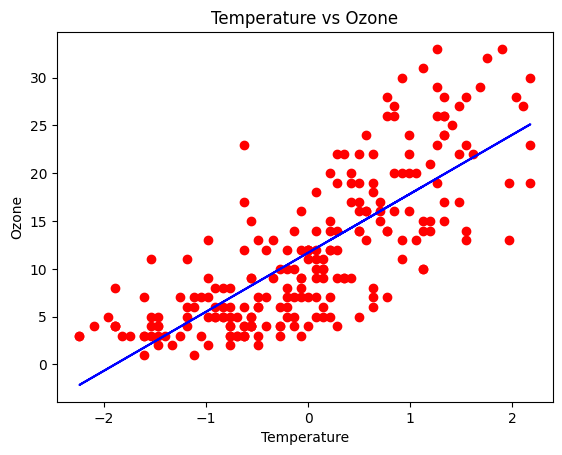

In [8]:
# plot the temperature vs ozone data and the linear regression line
plt.scatter(x_temp_train, y_train, color='red')
plt.plot(x_temp_train, lr.predict(x_temp_train), color='blue')
plt.title('Temperature vs Ozone')
plt.xlabel('Temperature')
plt.ylabel('Ozone')
plt.show()

# C. Linear regression on splitted data by median (50 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با در نظر گرفتن ویژگی انتخاب شده در قسمت (ب)، محدوده ویژگی مورد نظر را به دو قسمت تقسیم کنید طوری که تعداد داده ها در هر دو دسته تقریبا برابر باشد. (برای مثال اگر محدوده داده بدست آمده بین ۰ تا ۱۰۰ بود و داده های بین ۰ تا ۴۰ و داده های بین ۴۰ تا ۱۰۰ تقریبا از نظر تعداد با هم برابر هستند، محدوده این ویژگی را از نقطه ۴۰ به دو قسمت تقسیم کنید). سپس برای هر کدام از قسمتها، رگرسیون خطی را اعمال کرده و خطای میانگین مجموع مربعات را برای داده های آموزش و تست را محاسبه نمایید. داده ها و خطوط برازش شده را در یک نمودار رسم کنید. سپس نتایج بدست آمده را با قسمت (ب) مقایسه نموده و اختلاف یا شباهت را بررسی نمایید.
</div>

In [9]:
# now split data into half with the median temperature and fit a linear regression model on each half and print the total mean squared error
median = np.median(x_temp_train)
x_temp_train1 = x_temp_train[x_temp_train < median].reshape(-1, 1)
x_temp_train2 = x_temp_train[x_temp_train >= median].reshape(-1, 1)
y_train1 = y_train[(x_temp_train < median).reshape(-1)]
y_train2 = y_train[(x_temp_train >= median).reshape(-1)]
lr1 = LinearRegression()
lr1.fit(x_temp_train1, y_train1)
lr2 = LinearRegression()
lr2.fit(x_temp_train2, y_train2)
y_pred1 = lr1.predict(x_temp_train1)
y_pred2 = lr2.predict(x_temp_train2)
mse1 = mean_squared_error(y_train1, y_pred1)
mse2 = mean_squared_error(y_train2, y_pred2)
print('Mean squared error: ', (mse1 + mse2) / 2)

Mean squared error:  21.9411598231583


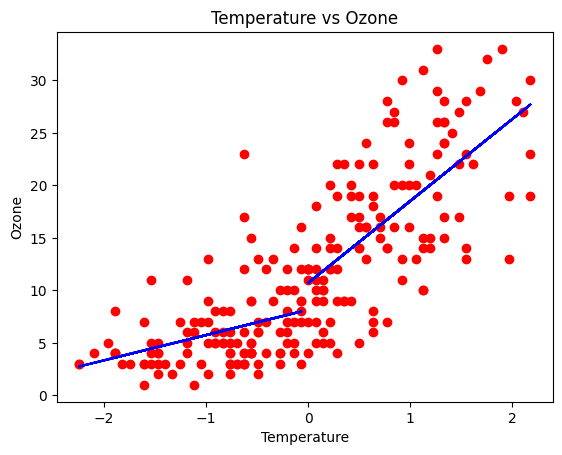

In [10]:
# plot the temperature vs ozone data and the linear regression line
plt.scatter(x_temp_train, y_train, color='red')
plt.plot(x_temp_train1, lr1.predict(x_temp_train1), color='blue')
plt.plot(x_temp_train2, lr2.predict(x_temp_train2), color='blue')
plt.title('Temperature vs Ozone')
plt.xlabel('Temperature')
plt.ylabel('Ozone')
plt.show()

In [11]:
# now evaluate the performance of the linear regression model using the test data
y_pred1 = lr1.predict(x_temp_test[x_temp_test < median].reshape(-1, 1))
y_pred2 = lr2.predict(x_temp_test[x_temp_test >= median].reshape(-1, 1))
mse1 = mean_squared_error(y_test[(x_temp_test < median).reshape(-1)], y_pred1)
mse2 = mean_squared_error(y_test[(x_temp_test >= median).reshape(-1)], y_pred2)
print('Mean squared error: ', (mse1 + mse2) / 2)

Mean squared error:  21.29393615530839
